## Using feedback to make a system not incontrol, in control.
Mathematically control is all about the poles.  If the real part of all the poles are on the left hand side of the complex plane (less than zero), then the system is in control. We can use a feedback network to move poles from the RHP to the left hand plane.

## Example 1 fixing a system out of control
$H(s)=\frac{1}{s-1}$
We can see that the pole is at 1, which is on t he left hand plane, so it it is out of control.  We can see the step response of the system grows exponentially by taking the inverse Laplace transform fo the transfer function $H(s)$.
$$L^{-}\left(\frac{1}{s-1}\right)=e^{t}u(t)$$
We are so used to seeing $e^{-t}$ which approaches zero for "long time" for filters that one might not notice that $e^{t}u(t)$ is exponential growth with positive times.
 

To make a new system that takes the system described by H(s), make a system with an summer, a feedback transfer function, G(s), and the original H(s) function that the system has a block diagram that results in:
$$
Q(s)=\frac{H(s)}{1+G(s)\times  H(s)}
$$
Where $Q(s)$ is the transfer function of the complete system. The figure below is the block diagram of a simple control system that will create Q(s).


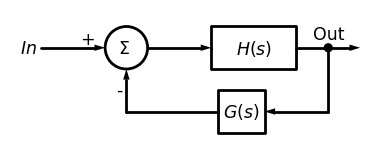

In [1]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()


Now that we have the block diagram for the new system, Q(s), we need to design G(s) to ensure all the poles are int he the LHP.  It can be help to break up H(s) into the numerator and denominator.
$$H(s)=\frac{N(s)}{D(s)}$$
In this example $N(s)=1$, and $D(s)=s-1$.
Substitute N(s) and D(s) into Q(s)
$$Q(s)=\frac{H(s)}{1+G(s)H(s)}=\frac{N(s)}{D(s)}\times\frac{1}{1+G(s)\times\frac{N(s)}{D(s)}}=\frac{N(s)}{D(s)+G(s)\times N(s)}$$

If we look at the above equation we see the numerator of Q(s) is the same as the numerator as H(s), and the original D(s) of H(s) is in Q(s)'s denominator.  What has changed is that the new denominator has a new term summed to the original D(s): G(s)N(s) now to make sure all the poles of Q(s) are int he LHP, we just have to choose a G(s) that makes roots of $D(s)+G(s)N(s)$ all on the LHP.

In this example: 
$$Q(s)=\frac{1}{s-1+G(s)\times 1}$$
What $G(s)\times 1$ will turn the pole at 1, negative?
In this case we need proportional feedback, so $G(s)=K$.
The pole becomes:
$s=+1-K$  what in the minium K that will make the pole negative?
$1-K<0$
$K>1$
The new Q(s) becomes:
$$Q(s)=\frac{1}{s-1+K\times 1}$$  if K>1, then the system will be in control.

In [2]:
from lcapy import s, j, pi, f, transfer, j2pif,t,exp
from sympy import *
K= symbols("K", positive=True)
import numpy as np
from matplotlib.pyplot import savefig
H=transfer(1/(s-1)).simplify()
G=K
Q=H/(1+G*H).normal()
Q



    1    
─────────
K + s - 1

We see the pole is will be(1-K), if K>1, then the system will be on control.  Set K=2:

In [3]:
Q=Q.subs(K,2)
Q

  1  
─────
s + 1

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

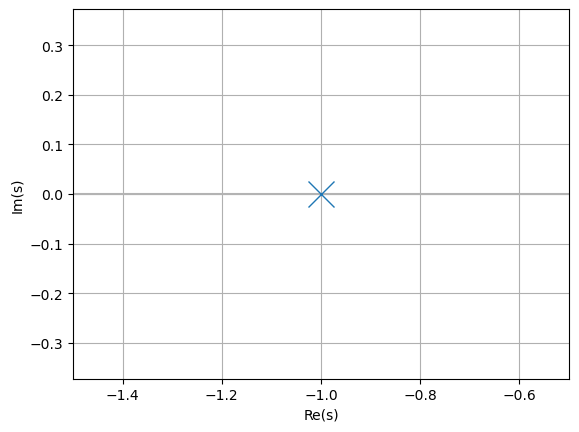

In [4]:
Q.plot()

In [5]:
Q.poles()

We can see the pole is now on the LHP.

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

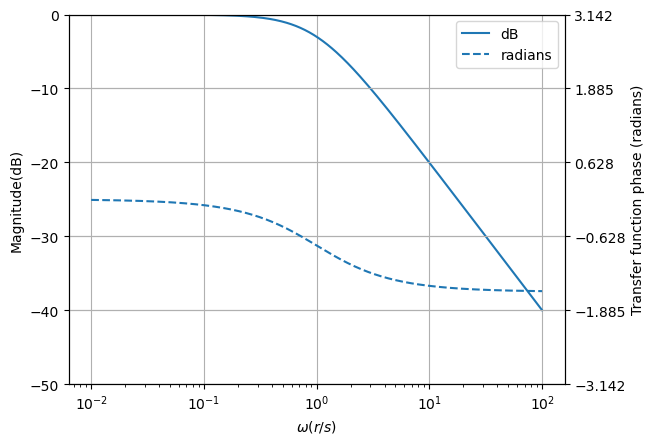

In [6]:

A = Q.subs(j * f)
fv = np.logspace(-2, 2, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

This looks is a regular high pass filter.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

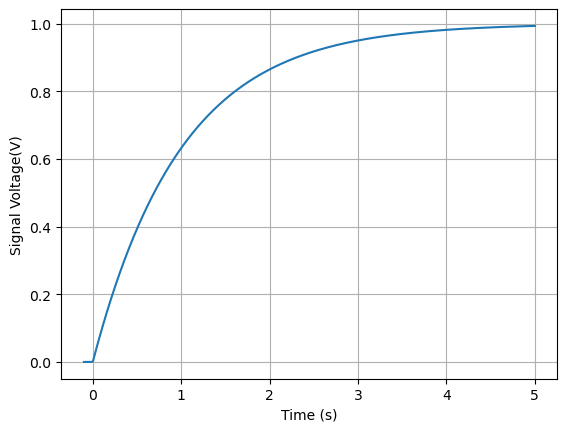

In [7]:
tv = np.linspace(-.1, 5, 400)
STEP=1/s 
F=Q*STEP
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

The step response is exponentially approaches a constant value, therefore it is in control.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

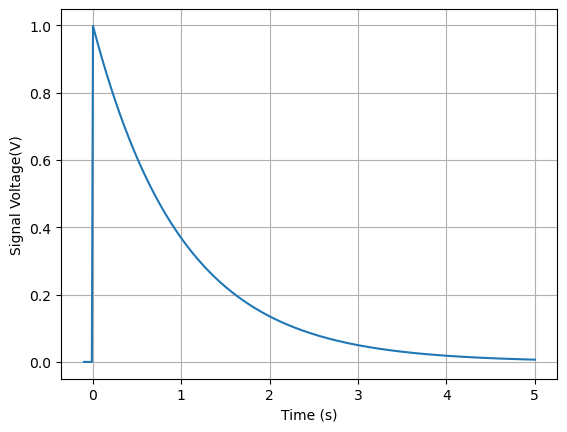

In [8]:
ht=Q(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')

The impulse response is exponentially decreasing, therefore it is in control.

## Extra Example

$H(s)=\frac{s}{s-1}$
$$Q(s)=\frac{H(s)}{1+G(s)H(s)}=\frac{N(s)}{D(s)}\times\frac{1}{1+G(s)\times\frac{N(s)}{D(s)}}=\frac{N(s)}{D(s)+G(s)\times N(s)}$$
$$Q(s)=\frac{s}{s-1+G(s)\times s}$$
Find G(s) such that $-1+G(s)\times s>0$
We have to turn s into a constant so that it can be summed with -1 to make a pole on the LHP.
Assume $G(s)=\frac{K}{s}$.

$$Q(s)=\frac{s}{s-1+\frac{K}{s}\times s}=\frac{s}{s-1+K}$$

As in the above example K>1 to make the system in control.


In [12]:
H=transfer(s/(s-1)).simplify()
G=K/s
Q=H/(1+G*H).normal()
Q

    s    
─────────
K + s - 1

In [13]:
Q=Q.subs(K,2)
Q


  s  
─────
s + 1

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

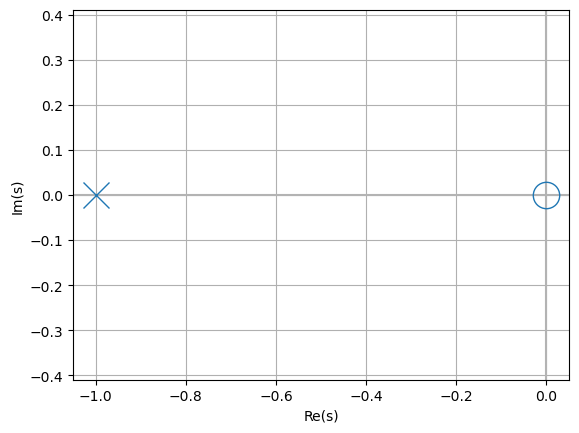

In [14]:
Q.plot()

In [15]:
Q.poles()

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

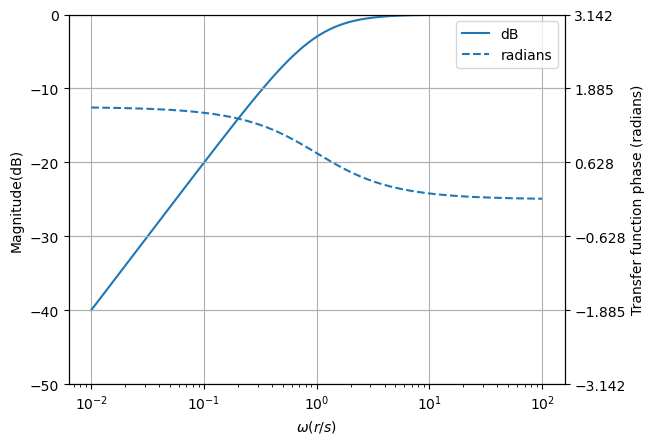

In [16]:
A = Q.subs(j * f)
fv = np.logspace(-2, 2, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

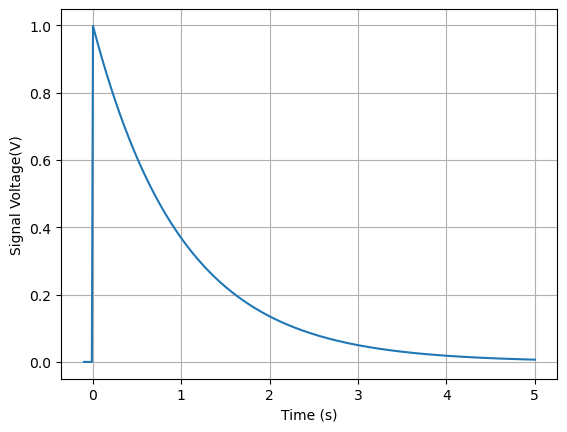

In [17]:
F=Q*STEP
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

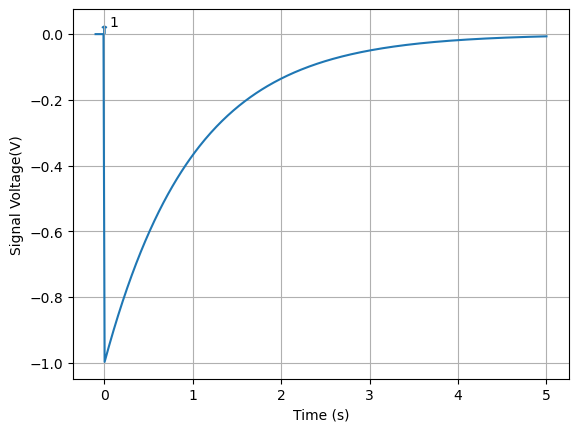

In [18]:
ht=Q(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')